 1) temp                           0.416319
 2) DMC                            0.132569
 3) RH                             0.088106
 4) ISI                            0.075632
 5) FFMC                           0.069701
 6) wind                           0.056796
 7) DC                             0.055511
 8) Y                              0.044505
 9) day                            0.027999
10) X                              0.026433
11) month                          0.006413
12) rain                           0.000017


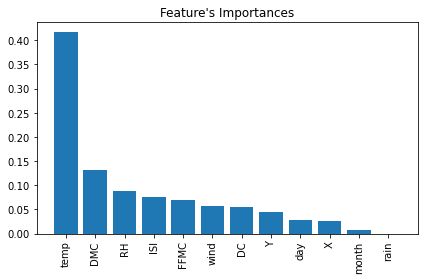


Random Forest Model Estimation:
R2_score:  0.0
MSE:  5826.33
MAE:  25.28

Linear Model Estimation:
R2_score:  0.018
MSE:  5721.27
MAE:  22.63

Polynomial Model Estimation:
R2_score:  -0.005
MSE:  5855.31
MAE:  24.97


In [106]:
import datetime
import pandas
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

N_ESTIMATORS = 52
TEST_SIZE = 0.2
R2_ACCURACY = 3
MSE_ACCURACY = 2
MAE_ACCURACY = 2

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
days = ['mon','tue','wed','thu','fri','sat','sun']


def get_month_number(month_name):
    return months.index(month_name)

def get_day_number(day_name):
    return days.index(day_name)

X = pandas.read_csv('forestfires.csv', ',')  # load rows from CSV file

Y = X['area']
X.drop(columns=['area'], inplace=True)
X['month'] = X['month'].apply(get_month_number) # transform months to integers from 0 to 11
X['day'] = X['day'].apply(get_day_number) # transform days to integers from 0 to 6

    # Calculating features importances
    feat_labels = X.columns[0:]
    forest = RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=1)
    #forest = RandomForestRegressor()
    forest.fit(X, Y)
    importances = forest.feature_importances_
    indices = numpy.argsort(importances)[::-1]
    for f in range(X.shape[1]):
        print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
    # Show features importances
    plt.title("Feature's Importances")
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), feat_labels[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

X.drop(columns=['month', 'rain'], inplace=True) # remove two least significant features

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=TEST_SIZE, random_state=1)
forestRegressor = RandomForestRegressor(n_estimators=N_ESTIMATORS, max_depth = 20, random_state=1)
forestRegressor.fit(X_train, y_train)
y_pred_forest = forestRegressor.predict(X_test)

print('\nRandom Forest Model Estimation:')
print('R2_score: ', round(r2_score(y_test, y_pred_forest), R2_ACCURACY))
print('MSE: ', round(mean_squared_error(y_test, y_pred_forest), MSE_ACCURACY))
print('MAE: ', round(mean_absolute_error(y_test, y_pred_forest), MAE_ACCURACY))

standardScaler = StandardScaler()
standardScaler.fit(X.values)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
y_pred_linear = linearModel.predict(X_test)

print('\nLinear Model Estimation:')
print('R2_score: ', round(r2_score(y_test, y_pred_linear), R2_ACCURACY))
print('MSE: ', round(mean_squared_error(y_test, y_pred_linear), MSE_ACCURACY))
print('MAE: ', round(mean_absolute_error(y_test, y_pred_linear), MAE_ACCURACY))

quadratic = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_train_quad = quadratic.fit_transform(X_train)
quadModel = LinearRegression()
quadModel.fit(X_train_quad, y_train)

X_test_quad = quadratic.fit_transform(X_test)
y_pred_quad = quadModel.predict(X_test_quad)

print('\nPolynomial Model Estimation:')
print('R2_score: ', round(r2_score(y_test, y_pred_quad), R2_ACCURACY))
print('MSE: ', round(mean_squared_error(y_test, y_pred_quad), MSE_ACCURACY))
print('MAE: ', round(mean_absolute_error(y_test, y_pred_quad), MAE_ACCURACY))

In [101]:
# Отчёт:
#
# Наилучшей моделью при дефолтных значениях параметров является Линейный регрессор.
# Наилучшей точности RandomForestRegressor достигает при количестве деревьев, равному 52 и max_depth = 20.
# Модель LinearRegression достигает наилучшей точности при дефолтных значениях параметров.
# Полиномиальная регрессионная модель достигает наилучшей точности при следующих значениях параметров: degree=2, interaction_only=True, include_bias=True
# Таким образом наилучшей моделью для данной задачи является регрессор, основанный на случайном лесе.